## Homework II

In [1]:
print('\nEnabling interactive shell outputs ...')
print('   Use command pass; to disable cell text outputs')
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import warnings
warnings.filterwarnings('ignore') 
warnings.simplefilter(action="ignore",category=UserWarning)
warnings.simplefilter(action="ignore",category=FutureWarning)

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols # Require patsy version 5.0.1+
from statsmodels.stats.anova import anova_lm

%matplotlib inline
%config InlineBackend.figure_formats = {'png', 'retina'}


Enabling interactive shell outputs ...
   Use command pass; to disable cell text outputs


1 A study to determine if a common pulsing electromagnetic field (PEMF) treatment could
moderate the substantial osteopenia that occurs after forearm disuse was conducted. Subjects
were randomized into four groups after a distal radius fracture, or carpal surgery requiring
immobilization in a cast. Active or identical sham PEMF transducers were worn on the distal
forearm for 1, 2, or 4 h/day for 8 weeks starting after cast removal ("baseline") when bone
density continues to decline. Bone mineral density (BMD) and bone geometry were measured
in the distal forearm by dual energy X-ray absorptiometry (DXA) and peripheral quantitative
computed tomography (pQCT). The data below are the percent losses in BMD measurements
on the radius after 16 weeks for patients wearing the active or sham PEMF transducers.

In [2]:
BMD_data = pd.DataFrame({'PEMFType': np.repeat(['sham','PEMF1h','PEMF2h','PEMF4h'],20), 
                         'BMD': [4.51, 7.95, 4.97, 3.00, 7.97,
                                 2.23, 3.95, 5.64, 9.35, 6.52,
                                 4.96, 6.10, 7.19, 4.03, 2.72,
                                 9.19, 5.17, 5.70, 5.85, 6.45,
                                 5.32, 6.00, 5.12, 7.08, 5.48,
                                 6.52, 4.09, 6.28, 7.77, 5.68,
                                 8.47, 4.58, 4.11, 5.72, 5.91,
                                 6.89, 6.99, 4.98, 9.94, 6.38,
                                 4.73, 5.81, 5.69, 3.86 ,4.06,
                                 6.56, 8.34, 3.01, 6.71, 6.51,
                                 1.70, 5.89, 6.55, 5.34, 5.88,
                                 7.50, 3.28, 5.38, 7.30, 5.46,
                                 7.03, 4.65, 6.65, 5.49, 6.98,
                                 4.85, 7.26, 5.92, 5.58, 7.91,
                                 4.90, 4.54, 8.18, 5.42, 6.03,
                                 7.04, 5.17, 7.60, 7.90, 7.91]})
BMD_data

,PEMFType,BMD
0,sham,4.51
1,sham,7.95
2,sham,4.97
3,sham,3.00
4,sham,7.97
...,...,...
75,PEMF4h,7.04
76,PEMF4h,5.17
77,PEMF4h,7.60
78,PEMF4h,7.90


A. Is there evidence to support a clain that PEMF usage affects BMD loss?
If so, analyze the data to determine which specific treatments produce the
differences.

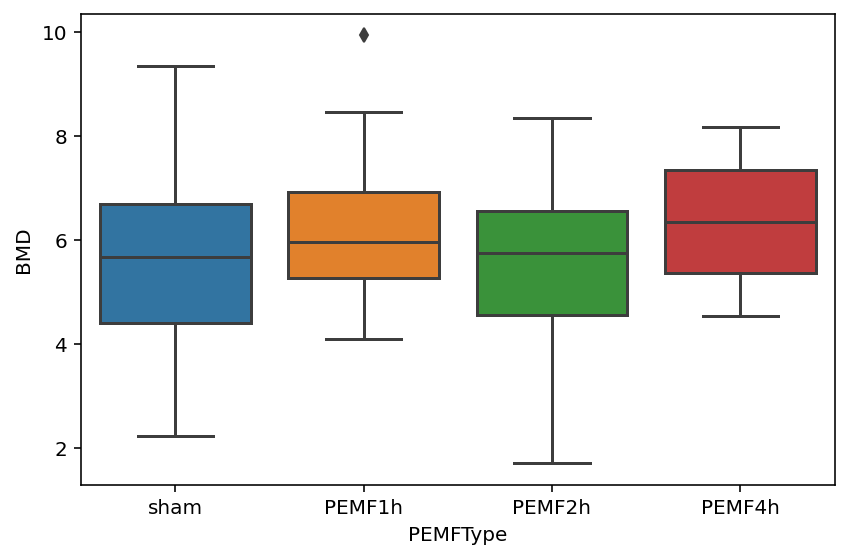

In [3]:
fig = plt.figure(figsize=(6,4));
sns.boxplot(x='PEMFType',y='BMD',data=BMD_data)
plt.tight_layout()
pass;

In [4]:
BMD_model = ols('BMD ~ PEMFType', data=BMD_data).fit()
BMD_data['resid'] = BMD_model.resid
aov_table = sm.stats.anova_lm(BMD_model, typ=1) 
aov_table

,df,sum_sq,mean_sq,F,PR(>F)
PEMFType,3.0,10.043504,3.347835,1.297941,0.281326
Residual,76.0,196.030085,2.579343,NaN,NaN


คำตอบ : จาก F-test ค่า p-value ของ F-test มีค่ามากกว่าค่า alpha (0.05) นั่นก็คือค่า BMD lossในแต่ละ treatment ไม่แตกต่างกัน

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
PEMF1h PEMF2h  -0.6875 0.5286 -2.0216 0.6466  False
PEMF1h PEMF4h    0.185    0.9 -1.1491 1.5191  False
PEMF1h   sham   -0.493 0.7414 -1.8271 0.8411  False
PEMF2h PEMF4h   0.8725 0.3217 -0.4616 2.2066  False
PEMF2h   sham   0.1945    0.9 -1.1396 1.5286  False
PEMF4h   sham   -0.678  0.539 -2.0121 0.6561  False
---------------------------------------------------


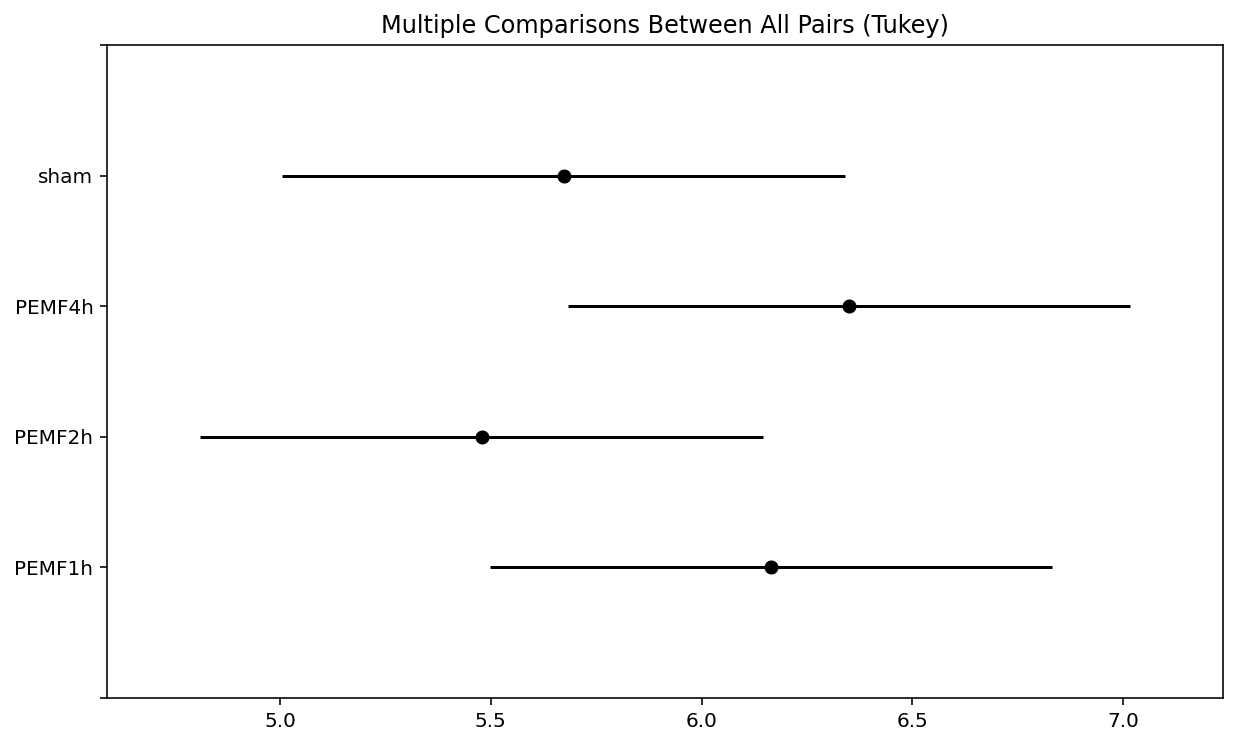

In [5]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

result=pairwise_tukeyhsd(BMD_data['BMD'],BMD_data['PEMFType'],alpha=0.05)
print(result)
result.plot_simultaneous();

คำตอบ : จาก tukey HSD pair-wise test ค่า p-value ของแต่ละคู่ มีค่ามากกว่าค่า alpha (0.05) นั่นก็คือ ค่า BMD loss ในแต่ละคุ่ treatment ไม่มีคู่ไหนแตกต่างกัน

B. Analyze the residuals and comment on the model assumptions and accuracy

In [6]:
def check_anova_normality(group, x):

    T = len(x)
    
    fig = plt.figure(figsize=(10,8))

    ax1 = fig.add_subplot(221)
    ax2 = fig.add_subplot(222)
    ax3 = fig.add_subplot(223)
    ax4 = fig.add_subplot(224)

    #ax1.plot(x, color='blue', alpha=0.5, linestyle='--', marker='o', ms=4)
    n=len(x)
    sns.residplot(np.linspace(1,n,n), x, color='blue', ax=ax1)
    ax1.set_title('Sequence plot')
    
    # Scatter plot
    #ax2.scatter(x, x.shift(), alpha=0.5, color='red')
    #ax2.set_title(r'Scatter plot of $e_n$ vs $e_{n+1}$')
    
    # Residual groupplot
    resid_df = pd.DataFrame({'Group':group, 'Resid':x})
    sns.stripplot(x='Group', y='Resid', data=resid_df, ax=ax2) 
    ax2.set_title('Residuals by treatments')
    
    # Box plot
    #ax2.boxplot(x,showmeans=True)
    #ax2.set_title('Boxplot')

    # histogram plot
    sns.distplot(x, hist=True, kde=True, ax=ax3)
    ax3.set_title('Histogram')

    # qq plot
    sm.graphics.qqplot(x,line='q',ax=ax4)
    ax4.set_title('Normal plot')
    plt.tight_layout()

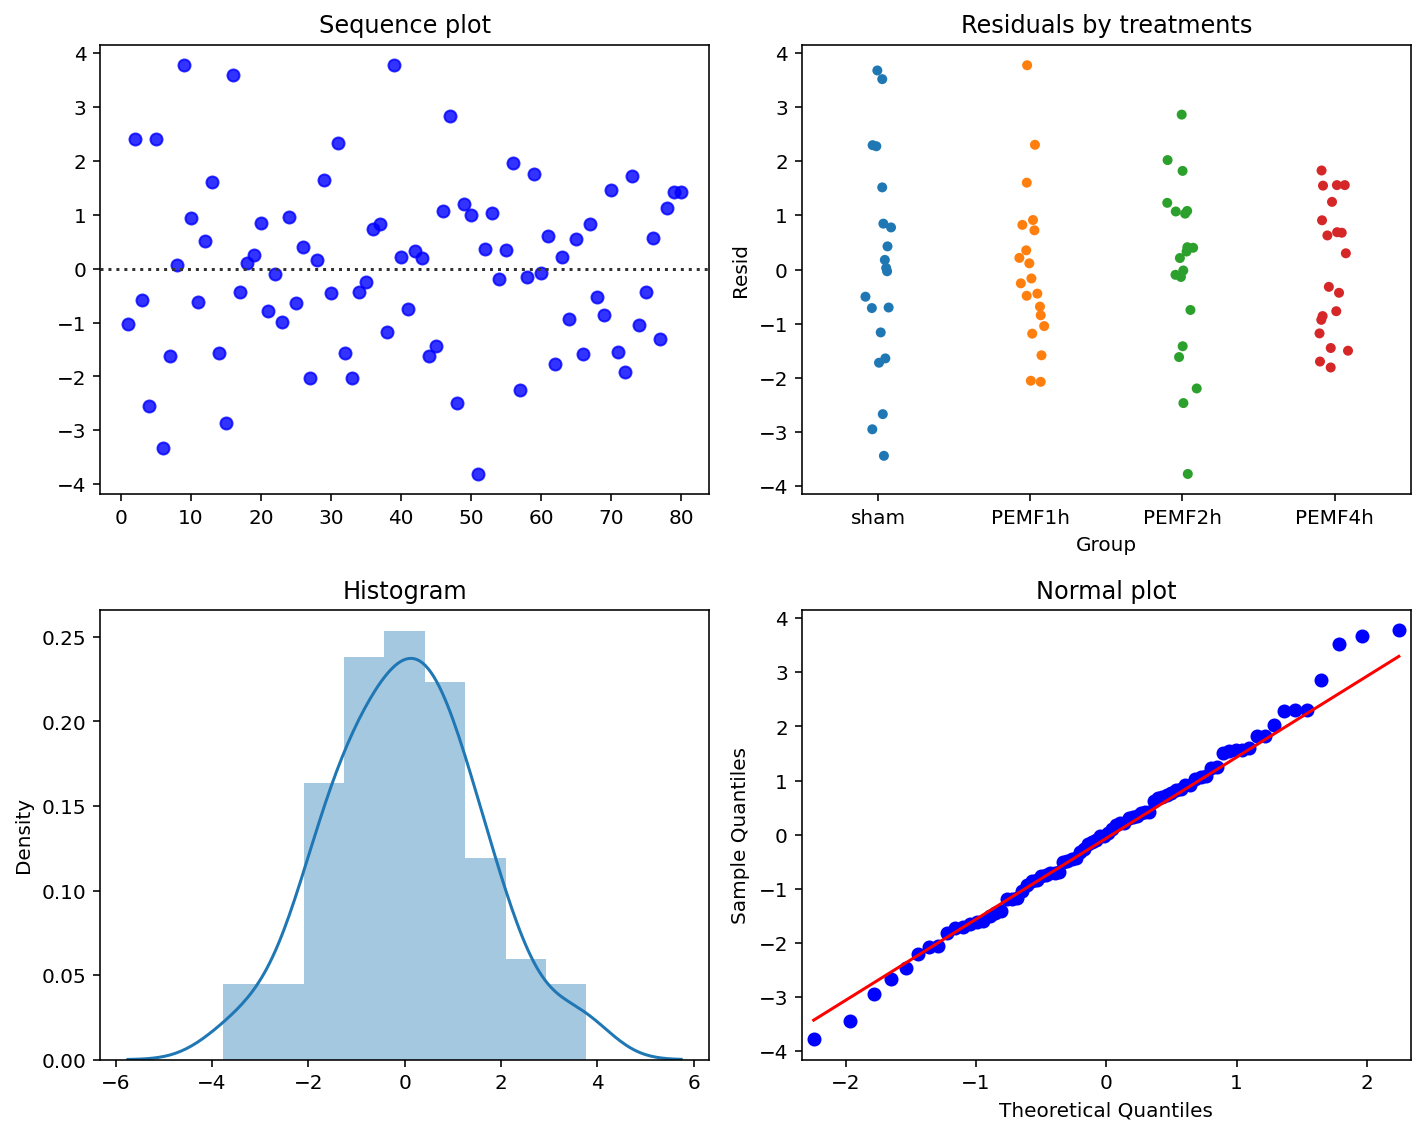

In [7]:
check_anova_normality(BMD_data['PEMFType'], BMD_model.resid)

คำตอบ : residuals ทุก treatment มีการกระจายตัวแบบ normal distribution และมีค่า variance ใกล้เคียงกันเนื่องจากค่า residuals กระจายตัวอยู่ในช่วงใกล้เคียงกัน

2 The effect of five different ingredients (A, B, C, D, E
on the reaction time of a chemical process is being studied.
Each batch of new material is only large enough to permit five
runs to be made. Furthermore, each run requires approximately
1 hours, so only five runs can be made in one day. The exper-
imenter decides to run the experiment as a Latin square so that
day and batch effects may be systematically controlled.  She
obtains the data that follow. Analyze the data from this exper-
iment (use a = 0.05) and draw conclusions.

In [8]:
ReactTime_data = pd.DataFrame({'ReactionTime': [8,7,1,7,3,11,2,7,3,8,4,9,10,1,5,6,8,6,6,10,4,2,3,8,8],
                         'Ingredient': ['A','B','D','C','E','C','E','A','D','B','B','A','C','E','D','D','C','E','B','A','E','D','B','A','C'],
                         'Bacth': np.repeat(['1','2','3','4','5'],5), 
                         'Day': ['1','2','3','4','5']*5})
ReactTime_data

,ReactionTime,Ingredient,Bacth,Day
0,8,A,1,1
1,7,B,1,2
2,1,D,1,3
3,7,C,1,4
4,3,E,1,5
5,11,C,2,1
6,2,E,2,2
7,7,A,2,3
8,3,D,2,4
9,8,B,2,5


In [9]:
# Compute variables
# p = 5
# degree_of_freedom(p-1) = 4
# N = 25
total_y = sum(ReactTime_data.ReactionTime)
SST = sum(ReactTime_data.ReactionTime**2) - (total_y**2)/25

# Compute SS terms
y_dot_j_dot = ReactTime_data.groupby('Ingredient').aggregate({'ReactionTime':'sum'}).ReactionTime
SSTr = sum(y_dot_j_dot**2)/5 - (total_y**2)/25
y_i_dot_dot = ReactTime_data.groupby('Bacth').aggregate({'ReactionTime':'sum'}).ReactionTime
SSrow = sum(y_i_dot_dot**2)/5 - (total_y**2)/25
y_dot_dot_k = ReactTime_data.groupby('Day').aggregate({'ReactionTime':'sum'}).ReactionTime
SScol = sum(y_dot_dot_k**2)/5 - (total_y**2)/25
SSE = SST - SSTr - SSrow - SScol
print("SST = {:.3f}, SSTr = {:.3f}, SSrow = {:.3f}, SScol = {:.3f}, SSE = {:.3f}".format(SST, SSTr, SSrow, SScol, SSE))

# Compute MS Terms
MSTr = SSTr/4
MSrow = SSrow/4
MScol = SScol/4
MSE = SSE/12 # (p-2)(p-1) = 3*4 = 12
F0 = MSTr/MSE
p_value = stats.f.sf(F0, 4,12)
print("MSTr = {0:.3f}, MSE = {1:.3f}, F0 = {2:.3f}, P-value = {3:.3f}".format(MSTr, MSE, F0, p_value)) 

SST = 206.640, SSTr = 141.440, SSrow = 15.440, SScol = 12.240, SSE = 37.520
MSTr = 35.360, MSE = 3.127, F0 = 11.309, P-value = 0.000


In [11]:
ReactionTime_model = ols('ReactionTime ~ Ingredient + Bacth + Day', data=ReactTime_data).fit()
ReactTime_data['resid'] = ReactionTime_model.resid
aov_table2 = sm.stats.anova_lm(ReactionTime_model, typ=1) 
aov_table2

,df,sum_sq,mean_sq,F,PR(>F)
Ingredient,4.0,141.44,35.360000,11.309168,0.000488
Bacth,4.0,15.44,3.860000,1.234542,0.347618
Day,4.0,12.24,3.060000,0.978678,0.455014
Residual,12.0,37.52,3.126667,NaN,NaN


คำตอบ : จาก F-test ค่า p-value ของ F-test มีค่าน้อยกว่าค่า alpha (0.05) นั่นก็คือค่า reaction time ในแต่ละ ingredients แตกต่างกัน

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     A      B     -2.8 0.1422 -6.2173  0.6173  False
     A      C      0.4    0.9 -3.0173  3.8173  False
     A      D     -5.0 0.0024 -8.4173 -1.5827   True
     A      E     -5.2 0.0016 -8.6173 -1.7827   True
     B      C      3.2 0.0734 -0.2173  6.6173  False
     B      D     -2.2 0.3362 -5.6173  1.2173  False
     B      E     -2.4 0.2579 -5.8173  1.0173  False
     C      D     -5.4 0.0011 -8.8173 -1.9827   True
     C      E     -5.6  0.001 -9.0173 -2.1827   True
     D      E     -0.2    0.9 -3.6173  3.2173  False
----------------------------------------------------


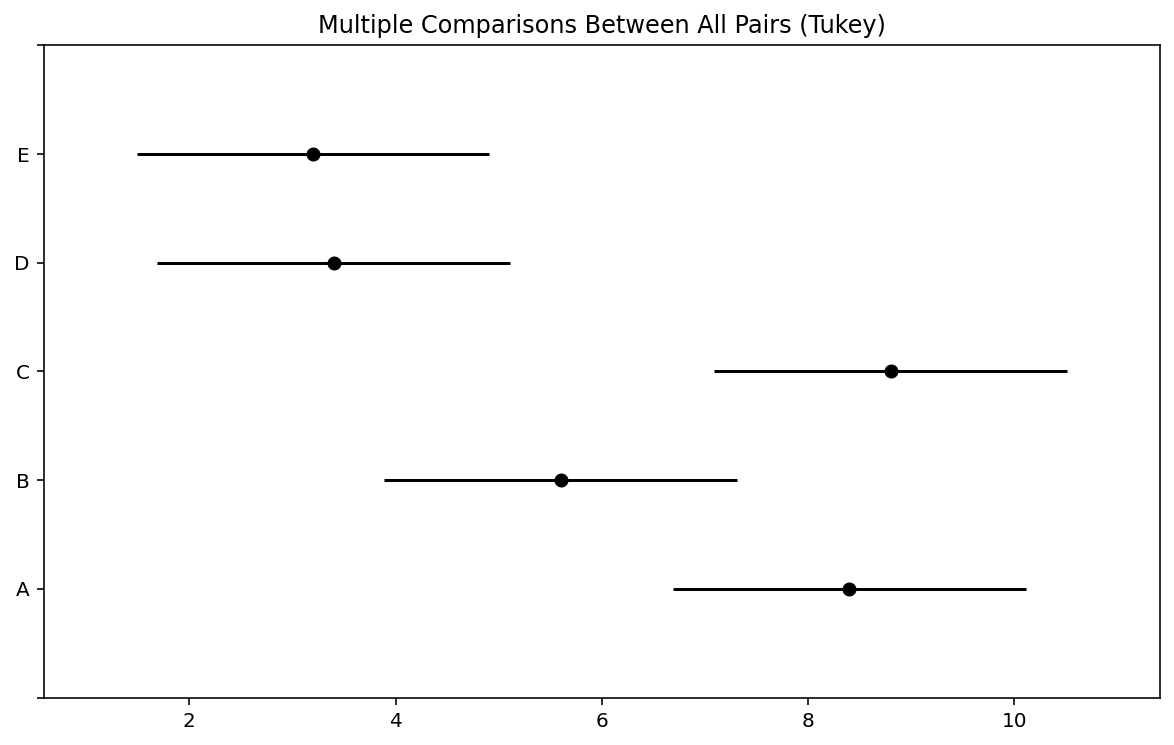

In [12]:
result=pairwise_tukeyhsd(ReactTime_data['ReactionTime'],ReactTime_data['Ingredient'],alpha=0.05)
print(result)
result.plot_simultaneous();

คำตอบ : จาก tukey HSD pair-wise test ค่า p-value ของคู่มีค่าน้อยกว่าค่า alpha (0.05) ได้แก่  A-D, A-E, C-D, C-E นั่นก็คือ ค่า reaction time ระหว่างคู่ดังกล่าวมีค่าต่างกันอย่างมีนัยสำคัญ